# Projeto prático 1 - Empresas-unicórnio

Unicornio: Start-up que atingiu o valor acima de 1 bilhão.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#ler os dados
base_dados = pd.read_csv('Startups+in+2021+end.csv')
base_dados.shape

(936, 8)

In [ ]:
base_dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#para investigar os tipos de valores das linhas
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#investigar campos nulos
base_dados.isnull().sum()

Unnamed: 0           0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
dtype: int64

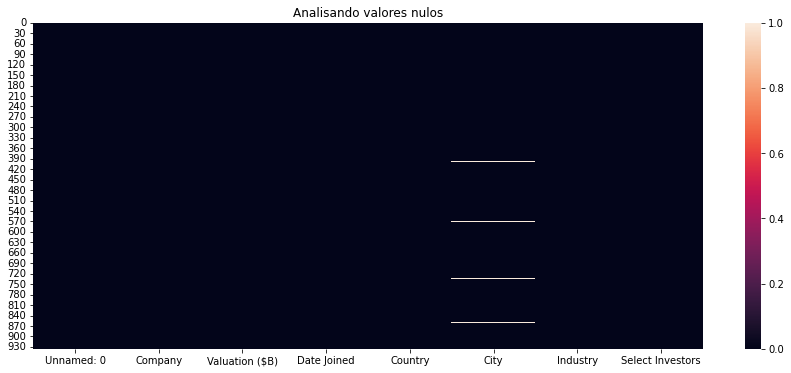

In [ ]:
#grafico pra mostrar os dados nulos
plt.figure(figsize = (15,6))
plt.title('Analisando valores nulos')
sns.heatmap(base_dados.isnull());

In [ ]:
#para saber os setores com maior número de
base_dados['Industry'].value_counts(normalize = True) #em porcentagem

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

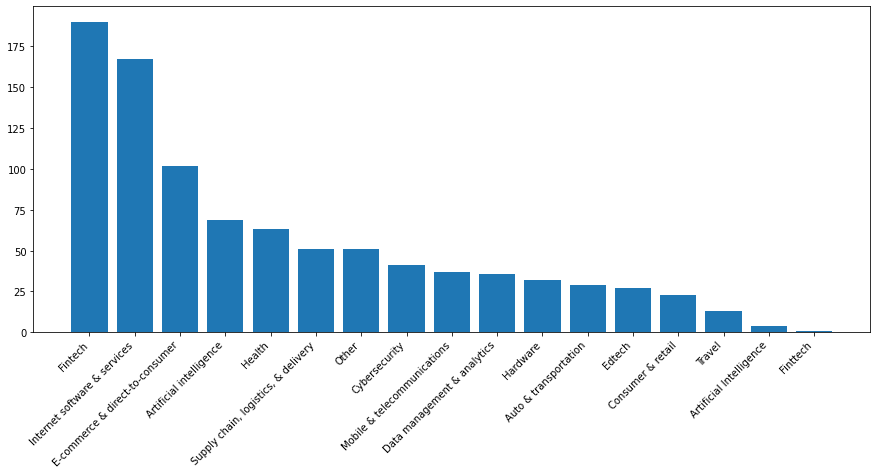

In [ ]:
plt.figure(figsize = (15,6))
plt.bar(base_dados['Industry'].value_counts().index, base_dados['Industry'].value_counts())
plt.xticks(rotation=45,ha = 'right')

In [ ]:
analise = round(base_dados['Country'].value_counts(normalize = True) * 100,1)

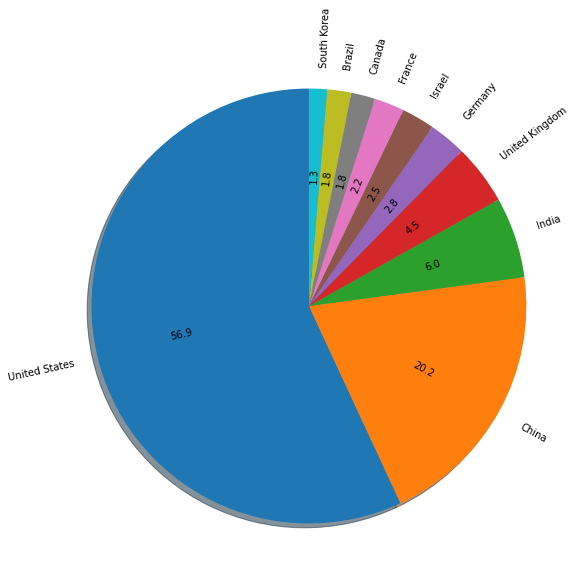

In [ ]:
#Top 5 países que mais tem empresas unicórnios

plt.figure(figsize = (15,10))
#plt.title('Top 5 países que mais tem empresas unicórnios', loc = 'left')
patches, labels, pct_texts = plt.pie(analise.head(10),
        labels = analise.index[:10],
        shadow = True,
        startangle = 90,
        autopct = '%1.1f', 
        rotatelabels = True);

for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())


In [ ]:
#conversão para data
base_dados['Date Joined'] = pd.to_datetime(base_dados['Date Joined'])

In [ ]:
#criar colunas com o mes e o ano
base_dados['Month'] = pd.DatetimeIndex(base_dados['Date Joined']).month
base_dados['Year'] = pd.DatetimeIndex(base_dados['Date Joined']).year

In [ ]:
#agrupando os dados por ano, mes e país
base_dados = base_dados.rename(columns={"Unnamed: 0":"Id"})
analise_dados = base_dados.groupby( by=['Country', 'Year', 'Month', 'Company'] ).count()['Id'].reset_index()


In [ ]:
#analisando o brasilanalise_dados.loc[analise_dados['Country']== 'Brazil']

In [ ]:
#transformando a coluna Valuation em valores numéricos
base_dados['Valuation ($B)'] = pd.to_numeric( base_dados['Valuation ($B)'].apply( lambda Linha: Linha.replace('$', '') ) )
base_dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
#Tabela analítica
analise_pais = base_dados.groupby(by = 'Country')['Valuation ($B)'].sum().reset_index()

In [ ]:
analise_valuation = analise_pais.sort_values('Valuation ($B)', ascending = False)

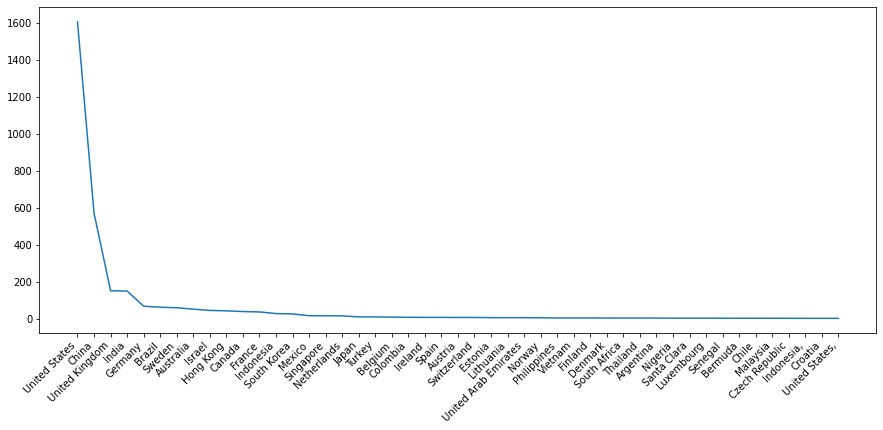

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(analise_valuation['Country'], analise_valuation['Valuation ($B)'])
plt.xticks(rotation=45,ha = 'right');